In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-alpha0


In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

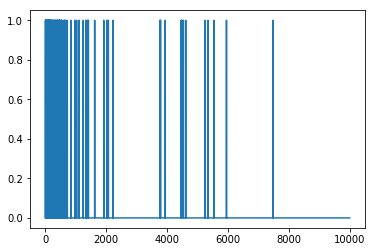

In [3]:
plt.plot(train_data[0])

In [4]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works. 
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [5]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 10s - loss: 0.4868 - accuracy: 0.7988 - binary_crossentropy: 0.4868 - val_loss: 0.3394 - val_accuracy: 0.8785 - val_binary_crossentropy: 0.3394
Epoch 2/20
25000/25000 - 6s - loss: 0.2484 - accuracy: 0.9140 - binary_crossentropy: 0.2484 - val_loss: 0.2860 - val_accuracy: 0.8876 - val_binary_crossentropy: 0.2860
Epoch 3/20
25000/25000 - 6s - loss: 0.1805 - accuracy: 0.9375 - binary_crossentropy: 0.1805 - val_loss: 0.2955 - val_accuracy: 0.8833 - val_binary_crossentropy: 0.2955
Epoch 4/20
25000/25000 - 5s - loss: 0.1463 - accuracy: 0.9506 - binary_crossentropy: 0.1463 - val_loss: 0.3293 - val_accuracy: 0.8720 - val_binary_crossentropy: 0.3293
Epoch 5/20
25000/25000 - 5s - loss: 0.1191 - accuracy: 0.9616 - binary_crossentropy: 0.1191 - val_loss: 0.3389 - val_accuracy: 0.8746 - val_binary_crossentropy: 0.3389
Epoch 6/20
25000/25000 - 5s - loss: 0.0962 - accuracy: 0.9714 - binary_crossentropy: 0.0962 - val_loss: 0.369

In [6]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [7]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 6s - loss: 0.5212 - accuracy: 0.8014 - binary_crossentropy: 0.5212 - val_loss: 0.4007 - val_accuracy: 0.8664 - val_binary_crossentropy: 0.4007
Epoch 2/20
25000/25000 - 5s - loss: 0.3102 - accuracy: 0.9011 - binary_crossentropy: 0.3102 - val_loss: 0.3149 - val_accuracy: 0.8851 - val_binary_crossentropy: 0.3149
Epoch 3/20
25000/25000 - 6s - loss: 0.2349 - accuracy: 0.9235 - binary_crossentropy: 0.2349 - val_loss: 0.2903 - val_accuracy: 0.8887 - val_binary_crossentropy: 0.2903
Epoch 4/20
25000/25000 - 6s - loss: 0.1942 - accuracy: 0.9365 - binary_crossentropy: 0.1942 - val_loss: 0.2850 - val_accuracy: 0.8882 - val_binary_crossentropy: 0.2850
Epoch 5/20
25000/25000 - 6s - loss: 0.1674 - accuracy: 0.9464 - binary_crossentropy: 0.1674 - val_loss: 0.2902 - val_accuracy: 0.8840 - val_binary_crossentropy: 0.2902
Epoch 6/20
25000/25000 - 6s - loss: 0.1473 - accuracy: 0.9530 - binary_crossentropy: 0.1473 - val_loss: 0.3011

In [8]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [9]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 6s - loss: 0.3423 - accuracy: 0.8550 - binary_crossentropy: 0.3423 - val_loss: 0.3108 - val_accuracy: 0.8720 - val_binary_crossentropy: 0.3108
Epoch 2/20
25000/25000 - 6s - loss: 0.1483 - accuracy: 0.9450 - binary_crossentropy: 0.1483 - val_loss: 0.3289 - val_accuracy: 0.8724 - val_binary_crossentropy: 0.3289
Epoch 3/20
25000/25000 - 7s - loss: 0.0523 - accuracy: 0.9846 - binary_crossentropy: 0.0523 - val_loss: 0.4490 - val_accuracy: 0.8677 - val_binary_crossentropy: 0.4490
Epoch 4/20
25000/25000 - 6s - loss: 0.0083 - accuracy: 0.9987 - binary_crossentropy: 0.0083 - val_loss: 0.6187 - val_accuracy: 0.8643 - val_binary_crossentropy: 0.6187
Epoch 5/20
25000/25000 - 6s - loss: 0.0011 - accuracy: 1.0000 - binary_crossentropy: 0.0011 - val_loss: 0.7018 - val_accuracy: 0.8683 - val_binary_crossentropy: 0.7018
Epoch 6/20
25000/25000 - 7s - loss: 2.4370e-04 - accuracy: 1.0000 - binary_crossentropy: 2.4370e-04 - val_loss

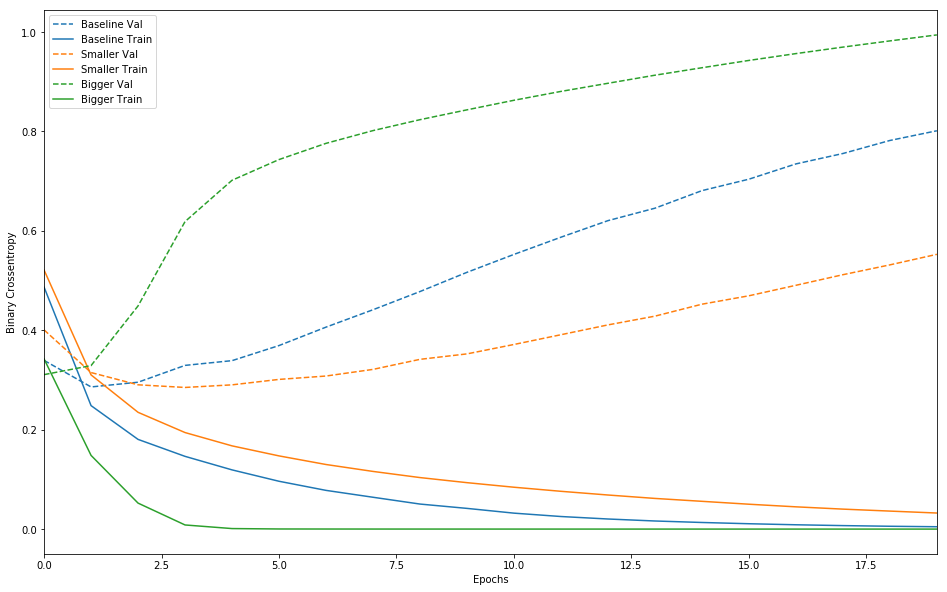

In [10]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [11]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 10s - loss: 0.5251 - accuracy: 0.8100 - binary_crossentropy: 0.4849 - val_loss: 0.3795 - val_accuracy: 0.8799 - val_binary_crossentropy: 0.3364
Epoch 2/20
25000/25000 - 7s - loss: 0.3055 - accuracy: 0.9080 - binary_crossentropy: 0.2575 - val_loss: 0.3369 - val_accuracy: 0.8871 - val_binary_crossentropy: 0.2855
Epoch 3/20
25000/25000 - 5s - loss: 0.2547 - accuracy: 0.9289 - binary_crossentropy: 0.2007 - val_loss: 0.3390 - val_accuracy: 0.8864 - val_binary_crossentropy: 0.2832
Epoch 4/20
25000/25000 - 5s - loss: 0.2327 - accuracy: 0.9396 - binary_crossentropy: 0.1752 - val_loss: 0.3554 - val_accuracy: 0.8806 - val_binary_crossentropy: 0.2966
Epoch 5/20
25000/25000 - 5s - loss: 0.2179 - accuracy: 0.9466 - binary_crossentropy: 0.1581 - val_loss: 0.3666 - val_accuracy: 0.8776 - val_binary_crossentropy: 0.3059
Epoch 6/20
25000/25000 - 5s - loss: 0.2064 - accuracy: 0.9515 - binary_crossentropy: 0.1448 - val_loss: 0.378

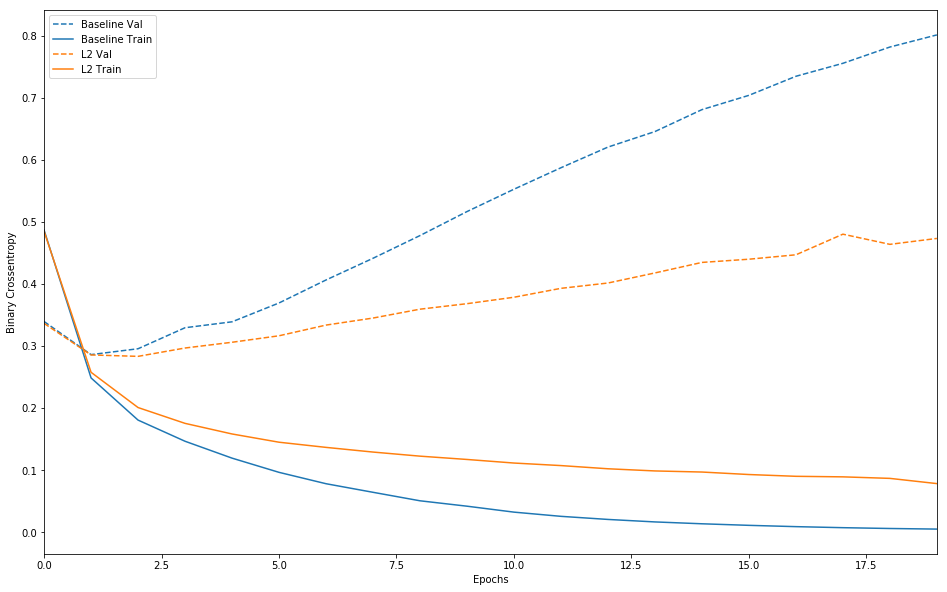

In [12]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [13]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 6s - loss: 0.6330 - accuracy: 0.6436 - binary_crossentropy: 0.6330 - val_loss: 0.5164 - val_accuracy: 0.8559 - val_binary_crossentropy: 0.5164
Epoch 2/20
25000/25000 - 6s - loss: 0.4823 - accuracy: 0.7900 - binary_crossentropy: 0.4823 - val_loss: 0.3644 - val_accuracy: 0.8806 - val_binary_crossentropy: 0.3644
Epoch 3/20
25000/25000 - 6s - loss: 0.3717 - accuracy: 0.8493 - binary_crossentropy: 0.3717 - val_loss: 0.2974 - val_accuracy: 0.8867 - val_binary_crossentropy: 0.2974
Epoch 4/20
25000/25000 - 5s - loss: 0.2989 - accuracy: 0.8898 - binary_crossentropy: 0.2989 - val_loss: 0.2765 - val_accuracy: 0.8880 - val_binary_crossentropy: 0.2765
Epoch 5/20
25000/25000 - 6s - loss: 0.2557 - accuracy: 0.9104 - binary_crossentropy: 0.2557 - val_loss: 0.2728 - val_accuracy: 0.8886 - val_binary_crossentropy: 0.2728
Epoch 6/20
25000/25000 - 5s - loss: 0.2219 - accuracy: 0.9238 - binary_crossentropy: 0.2219 - val_loss: 0.2813

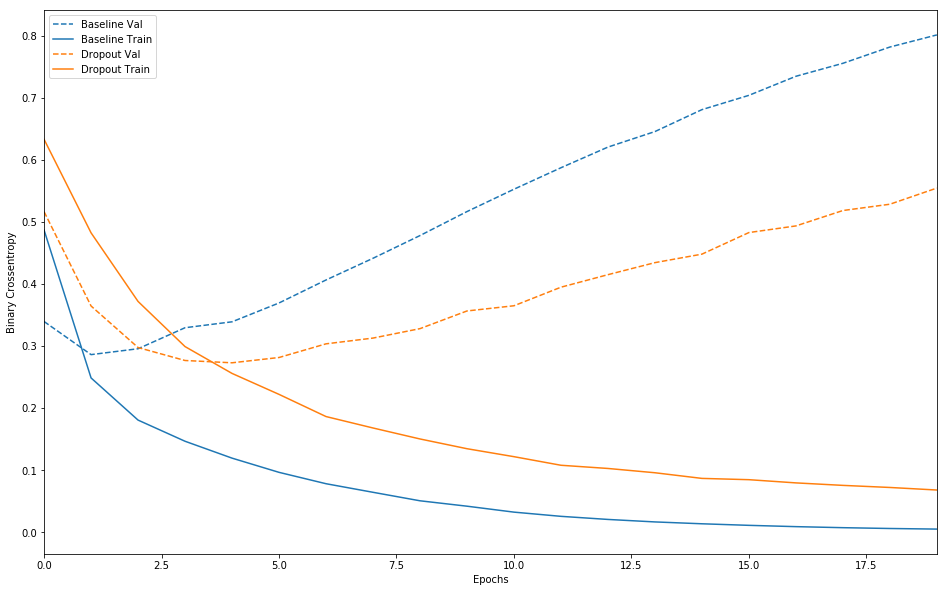

In [14]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])